#### 만약 미끄러진다면? 그걸 어떻게 잡을수있을까

Success rate: 0.5495
Final Q-Table Values
LEFT DOWN RIGHT UP
[[6.20182307e-01 4.97693712e-03 4.74447469e-03 1.46058019e-02]
 [2.59406979e-05 9.51916163e-03 2.03677270e-03 7.54031387e-01]
 [4.59358478e-01 7.50340083e-03 4.95128177e-04 3.16924551e-03]
 [1.34183223e-02 2.62550928e-03 2.46798522e-04 2.96760440e-03]
 [7.75979633e-01 1.95428492e-04 1.08293314e-02 8.02069383e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.02861072e-06 1.61495650e-05 8.87278311e-03 2.94254620e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.57374949e-04 4.79163242e-03 5.07382368e-03 9.12122190e-01]
 [9.16184150e-04 9.15904012e-01 0.00000000e+00 4.93595357e-04]
 [1.97714085e-01 0.00000000e+00 3.99700458e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.61897921e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.91866369e-01 0.00000000

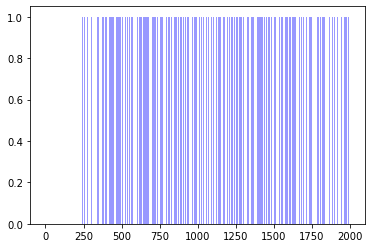

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
 
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85 # 이 비율을 바꿔가면 정답률도 바뀜 
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        #내가 원래 알던지식은 0.15 새로알게되는 지식은 0.85를 적용시킨느것임
        Q[state, action] = (1-learning_rate) * Q[state, action] \
            + learning_rate*(reward + dis * np.max(Q[new_state, :]))
        # Q[state, action] = (reward + dis * np.max(Q[new_state, :])) #원래식
        rAll += reward
        state = new_state

    rList.append(rAll)
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()



